In [1]:
#%matplotlib widget

In [1]:
import sys
sys.path.append('/mnt/d/ariel2/code/core/')
sys.path.append('d:/ariel2/code/core/')
sys.path.append('/kaggle/input/my-ariel2-library')
import kaggle_support as kgs
import ariel_model
import ariel_simple
import ariel_simple2
import ariel_gp
import ariel_load
import ariel_load_FGS
import os
import numpy as np
import matplotlib.pyplot as plt
import copy
import importlib
from tqdm import tqdm
import seaborn as sns
import pandas as pd
kgs.debugging_mode = 1
kgs.profiling=False
kgs.n_workers = 6

local


In [11]:
train_data = kgs.load_all_train_data()
train_data = train_data

# t = []
# for ind in range(len(train_data)):
#     if ind not in [999, 114, 21, 647, 146, 147, 897, 364, 553, 1013, 264, 90, 931, 697, 501, 288, 689, 892, 64, 251, 298, 876, 886, 494, 220, 398, 16, 727, 277, 1067, 1021, 240, 1002, 809, 460, 665, 679, 729, 1049, 989, 383, 531, 305, 1025, 401, 838, 99, 163, 1055, 695, 894, 750, 111, 418, 328, 403, 680, 171, 683, 877, 761, 765, 956, 119, 618, 216, 60, 9, 0, 159, 1091, 112, 422, 885, 229, 140, 568, 787, 11, 686, 563, 53, 1063, 636, 107, 737, 700, 795, 646, 1022, 712, 375, 333, 516, 185, 441, 656, 237, 262, 306, 408, 992, 893, 869, 954, 978, 285, 487, 601, 642, 245, 72, 484, 582, 1065, 933, 129, 591, 476, 393, 430, 784, 373, 722, 965, 263, 366, 379, 807, 479, 570, 349, 760, 782, 184, 1030, 998, 546, 337, 888, 477, 547, 23, 371, 678, 311, 669, 440, 505, 196, 720, 425, 75, 174, 44, 969, 100, 78, 120, 475, 578, 361, 536, 653, 688, 810, 1058, 213, 294, 96, 1031, 758, 708, 733, 362, 135, 734, 847, 485, 619, 17, 709, 161, 823, 826, 677, 152, 794, 1028, 812, 739, 1001, 907, 19, 879, 698, 202, 192, 793, 1024, 467, 803, 870, 66, 178, 416, 801, 816, 658, 592, 249, 439, 663, 160, 1047, 492, 786, 74, 604, 993, 219, 673, 593, 59, 836, 1088, 1075, 325, 588, 208, 151, 961, 913, 873, 321, 740, 951, 1066, 514, 271, 799, 137, 206, 675, 518, 724, 508, 341, 735, 387, 555, 864, 935, 538, 815, 198, 180, 549, 820, 327, 93, 899, 390, 667, 117, 903, 1057, 906, 701, 87, 909, 470, 421, 449, 290, 47, 88, 641, 783, 270, 754, 128, 703, 404, 845, 1004, 385, 314, 842, 1027, 606, 378, 228, 257, 101, 338, 193, 1000, 829, 519, 529, 156, 209, 13, 497, 1046, 438, 230, 624, 704, 970, 496, 164, 772, 70, 692, 384, 736, 824, 1094, 136, 948, 1051, 639, 901, 307, 912, 650, 1054, 696, 279, 169, 199, 22, 1042, 269, 201, 796, 278, 1036, 941, 891, 396, 716, 410, 920, 575, 255, 778, 1081, 925, 562, 963, 372, 367, 212, 567, 1038, 472, 571, 730, 153, 916, 144, 942, 442, 1095, 613, 1092, 713, 92, 1079, 910, 166, 89, 629, 2, 884, 177, 651, 447, 702, 655, 344, 203, 725, 412, 319, 622, 602, 572, 108, 448, 27, 217, 323, 461, 149, 865, 975, 18, 83, 875, 973, 530, 62, 732, 145, 603, 915, 902, 950, 431, 972, 97, 959, 693, 415, 246, 839, 874, 1093, 343, 28, 905, 286, 86, 445, 738, 871, 611, 962, 503, 806, 856, 292, 468, 256, 539, 122, 348, 459, 515, 707, 374, 466, 1015, 493, 825, 881, 1084, 615, 46, 31, 58, 427, 576, 500, 747, 797, 483, 790, 406, 690, 889, 197, 79, 805, 977, 605, 517, 155, 682, 559, 581, 423, 315, 284, 76, 830, 310, 313, 7, 946, 513, 584, 347, 560, 1006, 932, 649, 1052, 424, 138, 26, 247, 749, 640, 955, 533, 580, 499, 1034, 666, 200, 785, 1040, 645, 1041, 545, 317, 345, 30, 543, 952, 259, 8, 464, 296, 148, 369, 187, 995, 242, 880, 426, 322, 757, 1087, 607, 450, 743, 14, 167, 265, 1008, 131, 69, 471, 55, 126, 1062, 91, 481, 831, 486, 623, 726, 985, 35, 282, 173, 346, 186, 1043, 37, 990, 1048, 813, 670, 746, 1017, 363, 252, 504, 612, 32, 718, 569, 326, 768, 866, 1064, 110, 631, 420, 332, 142, 20, 643, 1016, 742, 443, 984, 986, 1069, 828, 551, 510, 316, 234, 921, 261, 744, 764, 851, 154, 859, 561, 1020, 583, 253, 940, 821, 684, 254, 832, 699, 846, 918, 50, 949, 565, 172, 81, 473, 42, 506, 1053, 896, 634, 488, 706, 774, 113, 710, 352, 376, 526, 1039, 857, 1086, 304, 862, 1050, 1083, 218, 957, 48, 127, 102, 280, 51, 895, 359, 858, 238, 1090, 324, 105, 930, 776, 210, 1071, 632, 741, 444, 405, 944, 339, 791, 964, 971, 745, 189, 370, 293, 224, 1033, 437, 960, 241, 759, 236, 115, 1023, 861, 301, 509, 586, 103, 190, 715, 239, 451, 205, 77, 150, 434, 104, 409, 756, 157, 927, 853, 924, 1056, 121, 223, 250, 318, 56, 542, 1, 751, 600, 608, 926, 994, 878, 1011, 226, 585, 635, 182, 436, 541, 522, 266, 482, 227, 132, 819, 911, 779, 798, 388, 134, 1098, 287, 162, 15, 1035, 52, 65, 395, 94, 773, 843, 1096, 934, 685, 480, 428, 590, 235, 867, 130, 728, 175, 433, 243, 106, 868, 399, 1029, 411, 456, 633, 616, 368, 281, 674, 900, 637, 498, 1072, 827, 57, 188, 143, 664, 354, 991, 158, 817, 534, 351, 392, 495, 25, 630, 380, 24, 676, 802, 1007, 231, 29, 947, 1018, 1073, 248, 232, 939, 863, 850, 691, 587, 356, 1085, 489, 33, 4, 407, 195, 943, 1070, 54, 579, 609, 835, 917, 353, 457, 520, 537, 748, 833, 837, 276, 469, 525, 980, 1019, 40, 1089, 465, 771, 272, 331, 80, 966, 6, 299, 852, 511, 808, 233, 68, 781, 67, 919, 260, 413, 769, 302, 654, 139, 183, 303, 557, 360, 532, 308, 41, 1009, 890, 453, 694, 458, 723, 12, 979, 1082, 312, 714, 168, 540, 49, 620, 860, 381, 717, 267, 594, 804, 1044, 377, 770, 141, 854, 336, 342, 898, 400, 883, 814, 84, 626, 625, 659, 752, 507, 61, 904, 391, 268, 211, 512, 221, 283, 687, 124, 3, 116, 638, 958, 614, 214, 1074, 179, 988, 953, 454, 844, 822, 98, 1037, 1060, 660, 358, 222, 181, 573, 258, 340, 382, 1014, 767, 1026, 550, 225, 937, 45, 291, 355, 191, 194, 922, 762, 300, 320, 766, 274, 474, 389, 661, 657, 295, 1068, 564, 1059, 10, 502, 711, 908, 297, 1078, 841, 1061, 165, 628, 544, 527, 789, 95, 478, 82, 71, 719, 753, 244, 981, 419, 983, 402, 929, 800, 763, 455, 668, 968, 974, 662, 914, 528, 34, 840, 617, 463, 599, 435, 535, 207, 36, 491, 63, 597, 627, 432, 446, 621, 462, 610, 644, 574, 882, 589, 275, 133, 386, 1005, 872, 125, 566, 5, 523, 524, 123, 452, 834, 1076, 1032, 777, 938, 848, 681, 43, 554, 204, 928, 976, 982, 577, 775, 987, 996, 923, 671, 170, 731, 855, 397, 109, 755, 1080, 705, 38]:
#         t.append(train_data[ind])
#         #print(ind)
# train_data = t[:6]
# train_data_multi = []
# train_data_single = []
# for d in train_data:
#     if len(d.transits)==1:
#         train_data_single.append(d)
#     else:
#         train_data_multi.append(d)
# len(train_data_multi), len(train_data_single)

# train_data = train_data_multi

array([0.06140392, 0.01414174, 0.0262501 , 0.02110584, 0.00401491])

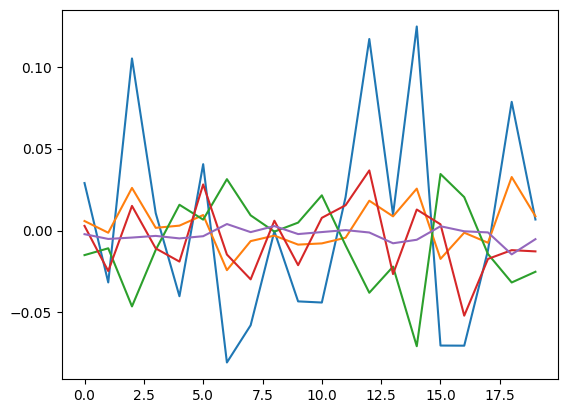

In [37]:
model = kgs.dill_load(kgs.temp_dir + 'evaluate_model_New new baseline__1099.pickle')[2]
ress = []
for d in train_data[:20]:
    model.model.model.run_in_parallel = False
    model.infer([d])
    mm = model.model.model.results['model_mean'].m['signal'].m['main'].m['transit']
    res = mm.get_parameters()[:,0]
    mu = mm.get_prior_matrices(model.model.model.results['obs']).prior_mean
    delta = res-mu
    delta_specific = delta[-mm.number_of_extra_parameters:][5:10]
    ress.append(delta_specific)
plt.figure()
plt.plot(ress)
np.std(ress,0)

array([0.01545073, 0.0073648 , 0.01564427, 0.01476225, 0.0045373 ])

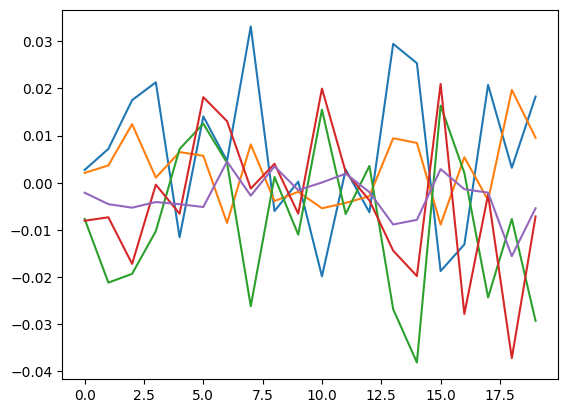

In [39]:
model = kgs.dill_load(kgs.temp_dir + 'evaluate_model_Ts slopes__1099.pickle')[2]
ress = []
for d in train_data[:20]:
    model.model.model.run_in_parallel = False
    model.infer([d])
    mm = model.model.model.results['model_mean'].m['signal'].m['main'].m['transit']
    res = mm.get_parameters()[:,0]
    mu = mm.get_prior_matrices(model.model.model.results['obs']).prior_mean
    delta = res-mu
    delta_specific = delta[-mm.number_of_extra_parameters:][5:10]
    ress.append(delta_specific)
plt.figure()
plt.plot(ress)
np.std(ress,0)